## Forecasting U.S. natural gas prices

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
DATA_PATH = Path("./data/MHHNGSP.csv")

In [6]:
# FRED CSV usually has columns like: DATE, MHHNGSP
# Missing values may be "." → treat as NaN with na_values=["."]
df = pd.read_csv(
    DATA_PATH,
    parse_dates=["observation_date"],
    na_values=["."],
)

In [7]:
# Set index and rename the value column
df = df.rename(columns={"observation_date": "date", "MHHNGSP": "price"}).set_index("date").sort_index()

In [8]:
# Enforce monthly start-of-month frequency (MS) and drop any missing
y = df.asfreq("MS")["price"].astype(float)

In [9]:
print(y.head())
print(y.tail())
print(f"Observations: {y.notna().sum()}")

date
1997-01-01    3.45
1997-02-01    2.15
1997-03-01    1.89
1997-04-01    2.03
1997-05-01    2.25
Freq: MS, Name: price, dtype: float64
date
2025-06-01    3.02
2025-07-01    3.20
2025-08-01    2.91
2025-09-01    2.97
2025-10-01    3.19
Freq: MS, Name: price, dtype: float64
Observations: 346


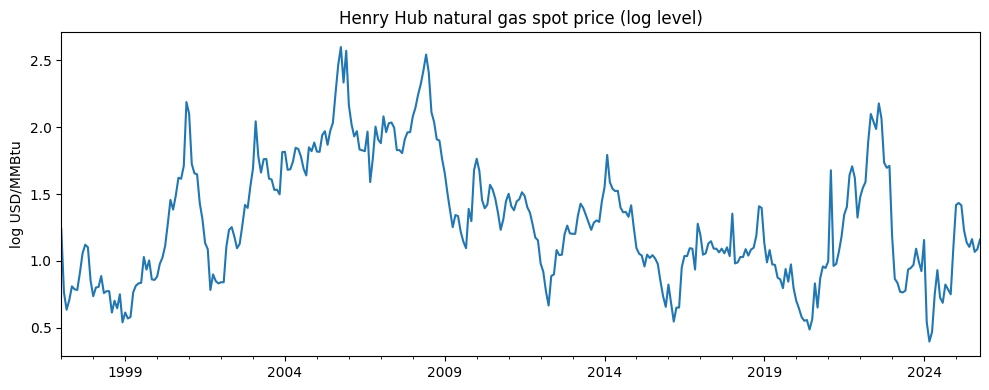

In [11]:
LOG = True  # set False if you prefer levels

series_to_plot = np.log(y) if LOG else y

ax = series_to_plot.plot(figsize=(10,4))
ax.set_title(f"Henry Hub natural gas spot price ({'log ' if LOG else ''}level)")
ax.set_ylabel("log USD/MMBtu" if LOG else "USD/MMBtu")
ax.set_xlabel("")
plt.tight_layout()
plt.show()